In [58]:
path = joinpath(Pkg.dir(),"Sugarscape", "src", "chapterII.jl")

"C:\\Users\\Ken\\.julia\\v0.3\\Sugarscape\\src\\chapterII.jl"

In [59]:
include(path)

In [60]:
sc = ChapterII

ChapterII

In [61]:
sc.run(1)
@time scape = sc.run(500)

elapsed time: 0.21361148 seconds (34653772 bytes allocated, 13.46% gc time)


Sugarscape with 400 agents


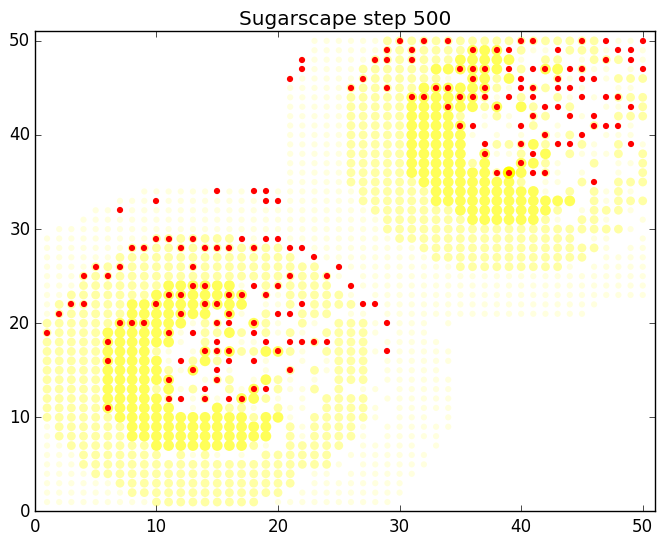

PyObject <matplotlib.text.Text object at 0x000000003A5E15C0>

In [62]:
sc.plot(scape)

### Figure II-4

In [63]:
function run_carrypop(N; kwargs...)
    carrypop = Int[]
    scape = sc.init_scape(sc.init_capacity(); kwargs...)    
    push!(carrypop, sum(map(sc.alive,scape.agents)))
    
    for cnt = 1:N
        sc.timestep(scape; kwargs...)
        push!(carrypop, sum(map(sc.alive,scape.agents)))
    end
    scape,carrypop
end

run_carrypop (generic function with 1 method)

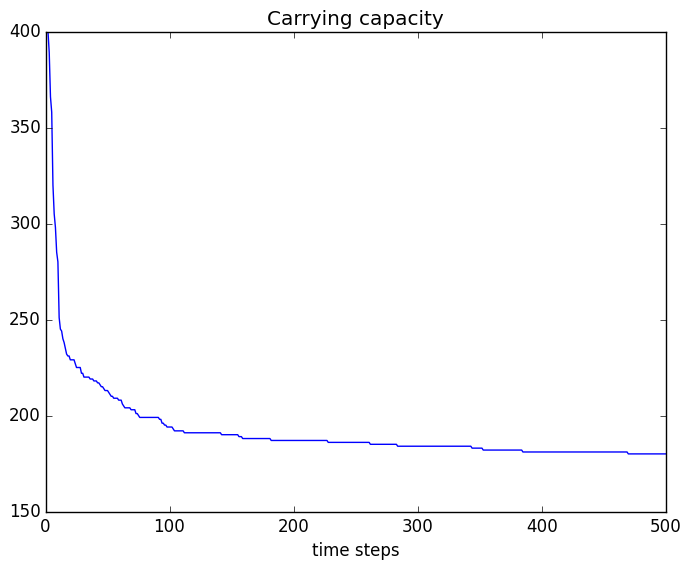

PyObject <matplotlib.text.Text object at 0x0000000039E780B8>

In [64]:
scape, carrypop = run_carrypop(500)
PyPlot.plot(carrypop)
PyPlot.title("Carrying capacity")
PyPlot.xlabel("time steps")

### Figures II-5

In [65]:
using DataFrames

In [69]:
function carrying(;sim_steps=3, time_steps=500)
    carry = DataFrame(vision=Int[], metabolism=Int[], population = Int[])
    
    for vision = 1:10, metabolism = 1:3, sims = 1:sim_steps
        scape = sc.run(time_steps; init_vision=()->rand(1:(2vision-1)), init_metabolism=()->rand(1:(2metabolism-1)))
        push!(carry, [vision, metabolism, sum(map(sc.alive, scape.agents))])
    end
    carry
end

carrying (generic function with 1 method)

In [70]:
carry = carrying();

,vision,metabolism,population
1,1,1,359
2,1,1,360
3,1,1,364
4,1,2,184
5,1,2,189
6,1,2,183
7,1,3,104
8,1,3,138
9,1,3,138
10,2,1,378


In [92]:
using Gadfly

In [104]:
carry_aggr = by(carry, [:vision, :metabolism],df -> DataFrame(pop = mean(df[:population])))
plot(carry_aggr, x=:vision, y=:pop, color=:metabolism, Geom.line)

,vision,metabolism,pop
1,1,1,361.0
2,1,2,185.33333333333334
3,1,3,126.66666666666667
4,2,1,377.6666666666667
5,2,2,217.66666666666666
6,2,3,151.33333333333334
7,3,1,383.0
8,3,2,232.0
9,3,3,153.33333333333334
10,4,1,385.6666666666667


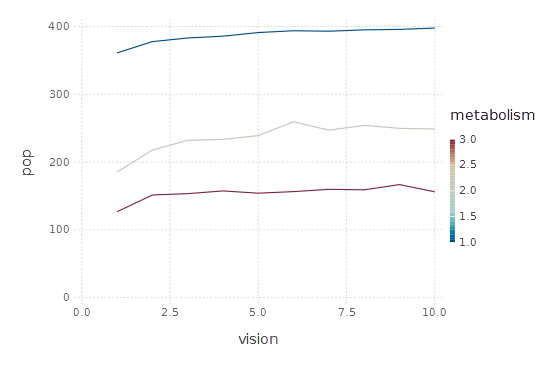

In [108]:
plot(carry_aggr, x=:vision, y=:pop, color=:metabolism, Geom.line)

### Animation II-3

In [112]:
import StatsBase

In [115]:
StatsBase.hist(scape.agents,10)

LoadError: `histrange` has no method matching histrange(::Array{AgentInfo,1}, ::Int64)
while loading In[115], in expression starting on line 1